In [ ]:
 from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 

projects = pd.read_csv('/content/drive/MyDrive/TAED2/The-Technical-Debt-Dataset-CSV/PROJECTS.csv')
projects

,PROJECT_KEY,GIT_LINK,JIRA_LINK,SONAR_PROJECT_KEY,PROJECT_ID
0,batik,https://github.com/apache/batik,https://issues.apache.org/jira/projects/BATIK,org.apache:batik,org.apache:batik
1,commons-bcel,https://github.com/apache/commons-bcel,https://issues.apache.org/jira/projects/BCEL,org.apache:bcel,org.apache:bcel
2,commons-beanutils,https://github.com/apache/commons-beanutils,https://issues.apache.org/jira/projects/BEANUTILS,org.apache:beanutils,org.apache:beanutils
3,cocoon,https://github.com/apache/cocoon,https://issues.apache.org/jira/projects/COCOON,org.apache:cocoon,org.apache:cocoon
4,commons-codec,https://github.com/apache/commons-codec,https://issues.apache.org/jira/projects/CODEC,org.apache:codec,org.apache:codec
5,commons-collections,https://github.com/apache/commons-collections,https://issues.apache.org/jira/projects/COLLEC...,org.apache:collections,org.apache:collections
6,commons-cli,https://github.com/apache/commons-cli,https://issues.apache.org/jira/projects/CLI,org.apache:commons-cli,org.apache:commons-cli
7,commons-exec,https://github.com/apache/commons-exec,https://issues.apache.org/jira/projects/EXEC,org.apache:commons-exec,org.apache:commons-exec
8,commons-fileupload,https://github.com/apache/commons-fileupload,https://issues.apache.org/jira/projects/FILEUP...,org.apache:commons-fileupload,org.apache:commons-fileupload
9,commons-io,https://github.com/apache/commons-io,https://issues.apache.org/jira/projects/IO/,org.apache:commons-io,org.apache:commons-io


In [ ]:
sonar_measures = pd.read_csv('/content/drive/MyDrive/TAED2/The-Technical-Debt-Dataset-CSV/SONAR_MEASURES.csv')
sonar_measures


,project_id,analysis_key,complexity,file_complexity,complexity_in_classes,class_complexity,complexity_in_functions,function_complexity,class_complexity_distribution,function_complexity_distribution,file_complexity_distribution,xs,xs_percent,tangle_design,fat_class,fat_design,fat_leaf_package,fat_method,cognitive_complexity,tests,test_execution_time,test_errors,skipped_tests,test_failures,test_success_density,test_data,coverage,new_coverage,lines_to_cover,new_lines_to_cover,uncovered_lines,new_uncovered_lines,line_coverage,new_line_coverage,coverage_line_hits_data,conditions_to_cover,new_conditions_to_cover,uncovered_conditions,new_uncovered_conditions,branch_coverage,...,sg_i.CORE_CCD,sg_i.CORE_VIOLATING_COMPONENTS,sg_i.JAVA_PACKAGES,sg_i.JAVA_CYCLIC_PACKAGES,sg_i.CORE_COMPONENTS,sg_i.CORE_MAX_ACD,sg_i.CORE_RACD,sg_i.CORE_COMPONENT_CYCLE_GROUPS,sg_i.CORE_PARSER_DEPENDENCIES_TO_REMOVE_COMPONENTS,sg_i.JAVA_BYTE_CODE_INSTRUCTIONS,sg_i.CORE_STATEMENTS,sg_i.JAVA_BIGGEST_PACKAGE_CYCLE_GROUP,sg_i.CORE_IGNORED_THRESHOLD_VIOLATIONS,sg_i.CORE_SOURCE_ELEMENT_COUNT,sg_i.CORE_IGNORED_CYCLIC_COMPONENTS,sg_i.JAVA_PACKAGE_CYCLE_GROUPS,sg_i.PERCENTAGEOFDEADCODE,sg_i.CORE_CYCLICITY_COMPONENTS,sg_i.CORE_DUPLICATED_LINES,sg_i.JAVA_PARSER_DEPENDENCIES_TO_REMOVE_PACKAGES,sg_i.STRUCTURAL_DEBT_COST,sg_i.CURRENT_VIRTUAL_MODEL,sg_i.VIRTUAL_MODEL_FEATURE_AVAILABLE,sg_i.NUMBER_OF_TASKS,sg_i.NUMBER_OF_UNAPPLICABLE_TASKS,sg_i.NUMBER_OF_RESOLUTIONS,sg_i.NUMBER_OF_UNAPPLICABLE_RESOLUTIONS,sg_i.NUMBER_OF_REFACTORINGS,sg_i.NUMBER_OF_UNAPPLICABLE_REFACTORINGS,sg_i.NUMBER_OF_PARSER_DEPENDENCIES_AFFECTED_BY_REFACTORINGS,sg_i.JAVA_CYCLIC_PACKAGES_PERCENT,sg_i.MAX_MODULE_NCCD,sg_i.ARCHITECTURE_FEATURE_AVAILABLE,sg_i.NUMBER_OF_ISSUES,sg_i.NUMBER_OF_CRITICAL_ISSUES_WITHOUT_RESOLUTION,sg_i.VIOLATING_COMPONENTS_PERCENT,sg_i.UNASSIGNED_COMPONENTS_PERCENT,sg_i.NUMBER_OF_THRESHOLD_VIOLATIONS,sg_i.NUMBER_OF_WORKSPACE_WARNINGS,sg_i.NUMBER_OF_IGNORED_CRITICAL_ISSUES
0,org.apache:cayenne,AWedEXD3C4KKKThcCqHV,30703.0,11.5,30387.0,10.9,29441.0,1.7,NaN,"1=11568,2=2821,4=891,6=307,8=164,10=97,12=147","0=1306,5=535,10=396,20=175,30=170,60=46,90=34",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,98298.0,24725.0,98298.0,24725.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,org.apache:cayenne,AWedCu_QC4KKKThcCqGv,30703.0,11.5,NaN,10.9,NaN,1.7,NaN,"1=11568,2=2821,4=891,6=307,8=164,10=97,12=147","0=1306,5=535,10=396,20=175,30=170,60=46,90=34",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,98298.0,NaN,98298.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,org.apache:cayenne,AWedBDbIC4KKKThcCqGA,30703.0,11.5,NaN,10.9,NaN,1.7,NaN,"1=11568,2=2821,4=891,6=307,8=164,10=97,12=147","0=1306,5=535,10=396,20=175,30=170,60=46,90=34",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,98306.0,NaN,98306.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,org.apache:cayenne,AWec_b8nC4KKKThcCqFg,30699.0,11.5,NaN,10.9,NaN,1.7,NaN,"1=11566,2=2821,4=891,6=307,8=164,10=97,12=147","0=1307,5=534,10=396,20=175,30=170,60=46,90=34",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,98290.0,NaN,98290.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,org.apache:cayenne,AWec904qC4KKKThcCqE3,30670.0,11.5,NaN,10.9,NaN,1.7,NaN,"1=11556,2=2819,4=891,6=306,8=164,10=97,12=147","0=1307,5=534,10=394,20=175,30=170,60=46,90=34",NaN,

In [ ]:
#print the name of all the columns in order to study each one
sm_col = sonar_measures.columns
for i in range(len(sm_col)):
  print(i, " ", sm_col[i])


0   project_id
1   analysis_key
2   complexity
3   file_complexity
4   complexity_in_classes
5   class_complexity
6   complexity_in_functions
7   function_complexity
8   class_complexity_distribution
9   function_complexity_distribution
10   file_complexity_distribution
11   xs
12   xs_percent
13   tangle_design
14   fat_class
15   fat_design
16   fat_leaf_package
17   fat_method
18   cognitive_complexity
19   tests
20   test_execution_time
21   test_errors
22   skipped_tests
23   test_failures
24   test_success_density
25   test_data
26   coverage
27   new_coverage
28   lines_to_cover
29   new_lines_to_cover
30   uncovered_lines
31   new_uncovered_lines
32   line_coverage
33   new_line_coverage
34   coverage_line_hits_data
35   conditions_to_cover
36   new_conditions_to_cover
37   uncovered_conditions
38   new_uncovered_conditions
39   branch_coverage
40   new_branch_coverage
41   conditions_by_line
42   covered_conditions_by_line
43   it_coverage
44   new_it_coverage
45   it_lines_to

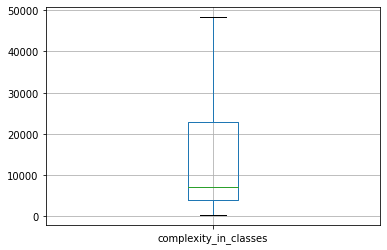

In [ ]:
#boxplot of "complexity in classes" column
sonar_measures.boxplot('complexity_in_classes', showfliers = False )

In [ ]:
#number of not na var
nas = sonar_measures['complexity_in_classes'].isna()
print(len(nas)-nas.sum())

18


In [ ]:
#number of na's in the new lines variable
#this variable is interesting but th number of nas is too high, there's another variable that keeps the number of lines so maybe we can compute the value of this variable ourselves
a = sonar_measures['new_lines'].isna().sum()
l = len(sonar_measures['new_lines'])
print(a, l, a/l)
print(l-a)

66693 66711 0.9997301794306785
18


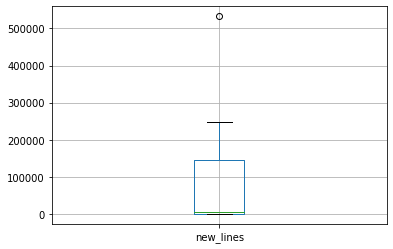

In [ ]:
#boxplot of new lines variable
sonar_measures.boxplot('new_lines', showfliers=True)

In [ ]:
#exploration of the development cost column
sonar_measures['development_cost'].describe()

count    6.671100e+04
mean     3.233803e+06
std      4.414751e+06
min      0.000000e+00
25%      5.468400e+05
50%      1.470510e+06
75%      4.056300e+06
max      2.231226e+07
Name: development_cost, dtype: float64

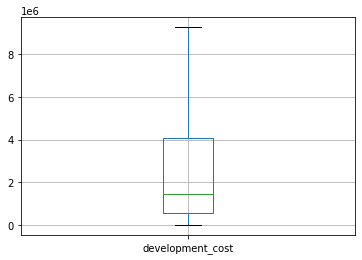

In [ ]:
#boxplot of the developmetn cost
sonar_measures.boxplot('development_cost', showfliers=False)

In [ ]:
#exploration of some columns, as we can see there a lot of columns full of NA's
sonar_measures.iloc[:,160:180]

,ncloc,ncloc_language_distribution,generated_ncloc,classes,files,directories,functions,accessors,statements,projects,comment_lines,comment_lines_density,ncloc_data,comment_lines_data,new_lines,sg_i.CORE_VIOLATIONS_COMPONENT_DEPENDENCIES,sg_i.CORE_BIGGEST_COMPONENT_CYCLE_GROUP,sg_i.CORE_UNASSIGNED_COMPONENTS,sg_i.CORE_EMPTY_ARTIFACT_COUNT,sg_i.CORE_LINES_OF_CODE
0,206900.0,"css=236,java=172713,web=16138,xml=17813",NaN,2793.0,2899.0,475.0,16830.0,NaN,77095.0,NaN,25329.0,10.9,NaN,NaN,86540.0,NaN,NaN,NaN,NaN,NaN
1,206900.0,"css=236,java=172713,web=16138,xml=17813",NaN,2793.0,2899.0,475.0,16830.0,NaN,77095.0,NaN,25329.0,10.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,206911.0,"css=236,java=172724,web=16138,xml=17813",NaN,2793.0,2899.0,475.0,16830.0,NaN,77101.0,NaN,25329.0,10.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,206876.0,"css=236,java=172689,web=16138,xml=17813",NaN,2793.0,2899.0,475.0,16828.0,NaN,77085.0,NaN,25329.0,10.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,206674.0,"css=236,java=172487,web=16138,xml=17813",NaN,2791.0,2897.0,475.0,16815.0,NaN,76996.0,NaN,25316.0,10.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66706,61360.0,"java=57607,web=884,xml=2869",NaN,733.0,424.0,28.0,4233.0,NaN,29060.0,NaN,9304.0,13.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66707,61360.0,"java=57607,web=884,xml=2869",NaN,733.0,424.0,28.0,4233.0,NaN,29060.0,NaN,9304.0,13.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66708,61300.0,"java=57547,web=884,xml=2869",NaN,732.0,423.0,28.0,4230.0,NaN,29026.0,NaN,9302.0,13.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66709,61300.0,"java=57547,web=884,xml=2869",NaN,732.0,423.0,28.0,4230.0,NaN,29026.0,NaN,9302.0,13.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sonar_issues = pd.read_csv('/content/drive/MyDrive/TAED2/The-Technical-Debt-Dataset-CSV/SONAR_ISSUES.csv')
sonar_issues

,PROJECT_ID,CREATION_ANALYSIS_KEY,ISSUE_KEY,TYPE,RULE,SEVERITY,STATUS,RESOLUTION,EFFORT,DEBT,TAGS,CREATION_DATE,CLOSE_DATE,MESSAGE,COMPONENT,START_LINE,END_LINE,START_OFFSET,END_OFFSET,HASH,FROM_HOTSPOT,NOT_FOUND,CLOSE_ANALYSIS_KEY
0,org.apache:cayenne,AWd5_psxC4KKKThc-qK6,AWeF1RcPC4KKKThcBEZ8,CODE_SMELL,squid:S1133,INFO,OPEN,NaN,10.0,10.0,obsolete,2007-01-21 11:11:02,NaN,Do not forget to remove this deprecated code s...,Apache_Cayenne:framework/cayenne-jdk1.5-unpubl...,39.0,39.0,27.0,37.0,NaN,NaN,0,NaN
1,org.apache:cayenne,AWd5_psxC4KKKThc-qK6,AWeF1RcRC4KKKThcBEZ9,CODE_SMELL,squid:S1133,INFO,OPEN,NaN,10.0,10.0,obsolete,2007-01-21 11:11:02,NaN,Do not forget to remove this deprecated code s...,Apache_Cayenne:framework/cayenne-jdk1.5-unpubl...,45.0,45.0,27.0,38.0,NaN,NaN,0,NaN
2,org.apache:cayenne,AWd5_psxC4KKKThc-qK6,AWeF1RcSC4KKKThcBEZ-,CODE_SMELL,squid:S1133,INFO,OPEN,NaN,10.0,10.0,obsolete,2007-01-21 11:11:02,NaN,Do not forget to remove this deprecated code s...,Apache_Cayenne:framework/cayenne-jdk1.5-unpubl...,51.0,51.0,24.0,37.0,NaN,NaN,0,NaN
3,org.apache:cayenne,AWd5_psxC4KKKThc-qK6,AWeF1RcSC4KKKThcBEZ_,CODE_SMELL,squid:S1133,INFO,OPEN,NaN,10.0,10.0,obsolete,2007-01-21 11:11:02,NaN,Do not forget to remove this deprecated code s...,Apache_Cayenne:framework/cayenne-jdk1.5-unpubl...,59.0,59.0,24.0,38.0,NaN,NaN,0,NaN
4,org.apache:cayenne,AWd5_psxC4KKKThc-qK6,AWd5_rilC4KKKThc-rwE,CODE_SMELL,squid:S1135,INFO,CLOSED,FIXED,NaN,NaN,cwe,2007-01-21 11:11:02,2007-08-21 13:26:38,Complete the task associated to this TODO comm...,Apache_Cayenne:framework/cayenne-jdk1.4-unpubl...,33.0,33.0,0.0,71.0,NaN,NaN,0,AWeF1Ou7C4KKKThcBEZc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024609,org.apache:zookeeper,AWMdqqQTO48jNFNDElBo,AWMdqrV-O48jNFNDElBu,CODE_SMELL,squid:S00117,MINOR,OPEN,NaN,2.0,2.0,convention,2016-12-21 22:32:01,NaN,Rename this local variable to match the regula...,org.apache:zookeeper:src/java/test/org/apache/...,202.0,202.0,18.0,22.0,NaN,NaN,0,NaN
1024610,org.apache:zookeeper,AWMdqqQTO48jNFNDElBo,AWMdqrV-O48jNFNDElBv,BUG,squid:S1143,BLOCKER,OPEN,NaN,30.0,30.0,"cert,cwe,error-handling",2016-12-21 22:32:01,NaN,Remove this return statement from this finally...,org.apache:zookeeper:src/java/test/org/apache/...,157.0,157.0,16.0,22.0,NaN,NaN,0,NaN
1024611,org.apache:zookeeper,AWMdqqQTO48jNFNDElBo,AWMdqrV_O48jNFNDElBw,CODE_SMELL,squid:S1161,MAJOR,OPEN,NaN,5.0,5.0,bad-practice,2016-12-21 22:32:01,NaN,"Add the ""@Override"" annotation above this meth...",org.apache:zookeeper:src/java/test/org/apache/...,206.0,206.0,24.0,27.0,NaN,NaN,0,NaN
1024612,org.apache:zookeeper,AWMdqqQTO48jNFNDElBo,AWMdqrV-O48jNFNDElBt,CODE_SMELL,squid:HiddenFieldCheck,MAJOR,OPEN,NaN,5.0,5.0,"cert,pitfall",2016-12-21 22:32:01,NaN,"Rename ""PORT"" which hides the field declared a...",org.apache:zookeeper:src/java/test/org/apache/...,202.0,202.0,18.0,22.0,NaN,NaN,0,NaN


In [ ]:
#print the name of the sonar issues columns to study each one
issues_col = sonar_issues.columns
for i in range(len(issues_col)):
  print(i, " ", issues_col[i])

0   PROJECT_ID
1   CREATION_ANALYSIS_KEY
2   ISSUE_KEY
3   TYPE
4   RULE
5   SEVERITY
6   STATUS
7   RESOLUTION
8   EFFORT
9   DEBT
10   TAGS
11   CREATION_DATE
12   CLOSE_DATE
13   MESSAGE
14   COMPONENT
15   START_LINE
16   END_LINE
17   START_OFFSET
18   END_OFFSET
19   HASH
20   FROM_HOTSPOT
21   NOT_FOUND
22   CLOSE_ANALYSIS_KEY


In [ ]:
#ratio of nas of resolution variable, is high but we have still a lot of non null values
a = sonar_issues['RESOLUTION'].isna().sum()
l = len(sonar_issues['RESOLUTION'])
print('nas= ', a)
print('lenght= ',l)
print('na ratio =', a/l)

nas=  225869
lenght=  1024614
na ratio = 0.22044301561368476


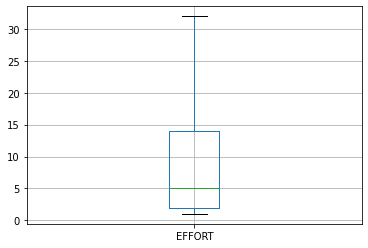

In [ ]:
#boxplot of effort variable
sonar_issues.boxplot('EFFORT', showfliers=False)

In [ ]:
#number of nas of effort vraiable
a = sonar_issues['EFFORT'].isna().sum()
l = len(sonar_issues['EFFORT'])
print(a, l, a/l)

31910 1024614 0.031143435479117014


In [ ]:
#summary of debt variable
sonar_issues['DEBT'].describe()

count    992704.000000
mean         18.539828
std         138.776940
min           1.000000
25%           2.000000
50%           5.000000
75%          14.000000
max       92297.000000
Name: DEBT, dtype: float64

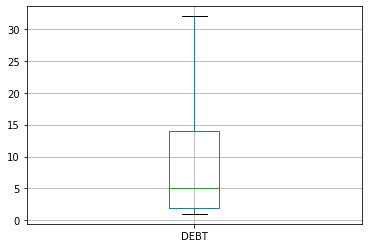

In [ ]:
#boxplot of debt variable
sonar_issues.boxplot('DEBT', showfliers=False)

In [ ]:
#number of nas of debt variable (is very small)
a = sonar_issues['DEBT'].isna().sum()
l = len(sonar_issues['DEBT'])
print(a, l, a/l)

31910 1024614 0.031143435479117014
